In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리
from sklearn.datasets import fetch_openml

In [2]:
from sklearn.datasets import load_linnerud

linnerud = load_linnerud()
print(linnerud.DESCR)

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.



In [3]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [4]:
df = pd.concat([pd.DataFrame(linnerud.data, columns=linnerud.feature_names),
                pd.DataFrame(linnerud.target, columns=linnerud.target_names)],
               axis=1)
df.tail()

,Chins,Situps,Jumps,Weight,Waist,Pulse
15,12.0,210.0,120.0,202.0,37.0,62.0
16,4.0,60.0,25.0,176.0,37.0,54.0
17,11.0,230.0,80.0,157.0,32.0,52.0
18,15.0,225.0,73.0,156.0,33.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


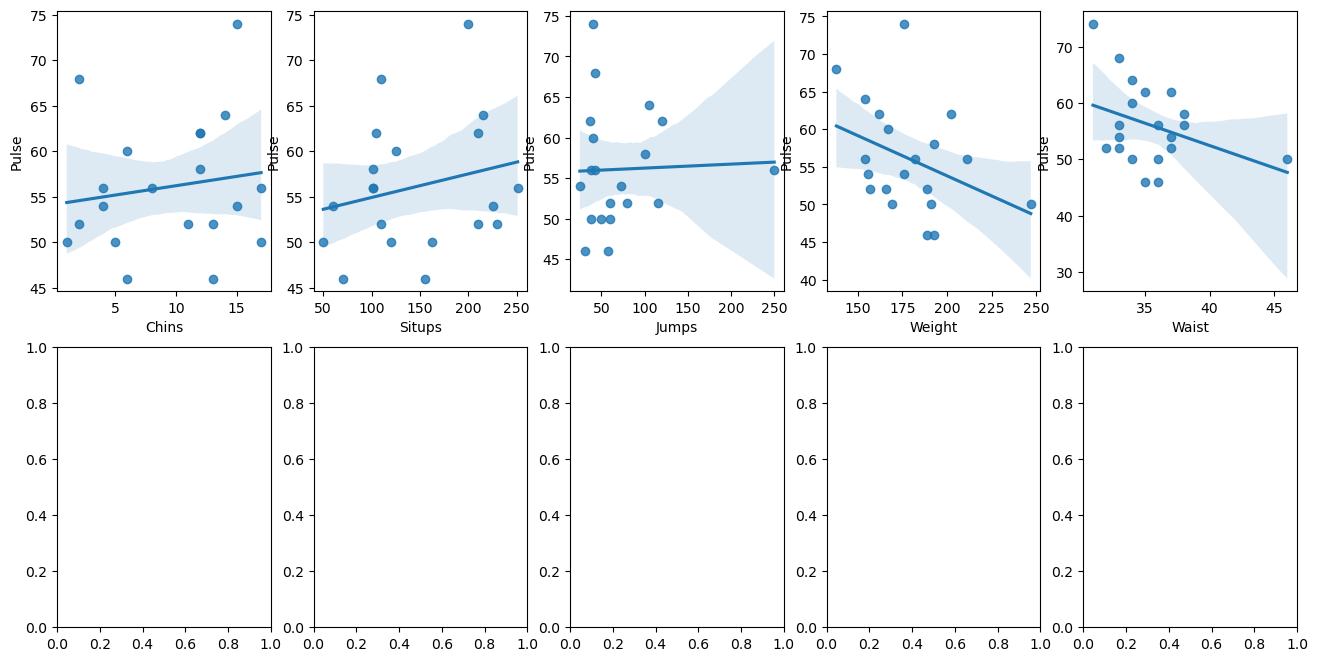

In [5]:
fig, axs = plt.subplots(figsize=(16,8), ncols=5, nrows=2)

lm_features = ['Chins','Situps','Jumps', 'Weight','Waist']

for i, feature in enumerate(lm_features):
    row = int(i/5) # 2행
    col = i%5

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='Pulse', data=df, ax=axs[row][col])

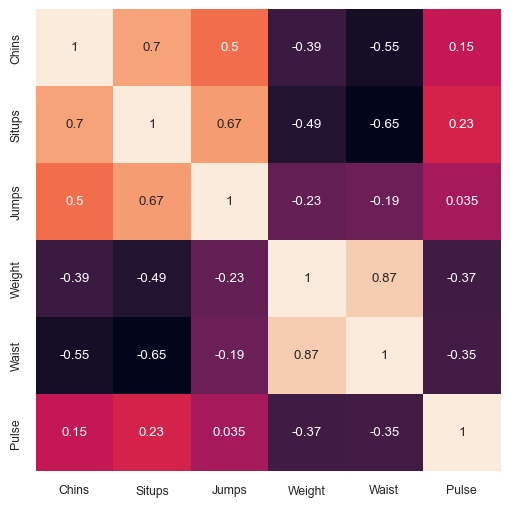

In [6]:
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(6,6))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [7]:
#Splitting the data into training and test test
X = df.iloc[:,0:5].values
Y = df['Pulse']

from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [8]:
X

array([[  5., 162.,  60., 191.,  36.],
       [  2., 110.,  60., 189.,  37.],
       [ 12., 101., 101., 193.,  38.],
       [ 12., 105.,  37., 162.,  35.],
       [ 13., 155.,  58., 189.,  35.],
       [  4., 101.,  42., 182.,  36.],
       [  8., 101.,  38., 211.,  38.],
       [  6., 125.,  40., 167.,  34.],
       [ 15., 200.,  40., 176.,  31.],
       [ 17., 251., 250., 154.,  33.],
       [ 17., 120.,  38., 169.,  34.],
       [ 13., 210., 115., 166.,  33.],
       [ 14., 215., 105., 154.,  34.],
       [  1.,  50.,  50., 247.,  46.],
       [  6.,  70.,  31., 193.,  36.],
       [ 12., 210., 120., 202.,  37.],
       [  4.,  60.,  25., 176.,  37.],
       [ 11., 230.,  80., 157.,  32.],
       [ 15., 225.,  73., 156.,  33.],
       [  2., 110.,  43., 138.,  33.]])

In [9]:
Y

0     50.0
1     52.0
2     58.0
3     62.0
4     46.0
5     56.0
6     56.0
7     60.0
8     74.0
9     56.0
10    50.0
11    52.0
12    64.0
13    50.0
14    46.0
15    62.0
16    54.0
17    52.0
18    54.0
19    68.0
Name: Pulse, dtype: float64

In [10]:
X.shape

(20, 5)

In [11]:
Y.shape

(20,)

In [12]:
import numpy as np
# 평균

mean = np.mean(x_train, axis = 0)

# 표준편차
std = np.std(x_train, axis = 0) # 표준편차값

# 표준화값
X_train = (x_train - mean) / std
X_test = (x_test - mean) / std

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (5,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                384       
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8769 (34.25 KB)
Trainable params: 8769 (34.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
1/1 [==============================] - 0s 180ms/step - loss: 3015.6914 - mse: 3015.6914 - val_loss: 3913.0859 - val_mse: 3913.0859
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 2989.4116 - mse: 2989.4116 - val_loss: 3886.9443 - val_mse: 3886.9443
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 2970.1433 - mse: 2970.1433 - val_loss: 3861.9419 - val_mse: 3861.9419
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 2951.4521 - mse: 2951.4521 - val_loss: 3836.3025 - val_mse: 3836.3025
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 2932.6226 - mse: 2932.6226 - val_loss: 3810.9653 - val_mse: 3810.9653
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 2912.7876 - mse: 2912.7876 - val_loss: 3785.0300 - val_mse: 3785.0300
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 2892.3909 - mse: 2892.3909 - val_loss: 3757.7227 - val_mse: 3757.7227
Epoch 8/100

1/1 [==============================] - 0s 8ms/step - loss: 584.7963 - mse: 584.7963 - val_loss: 434.5466 - val_mse: 434.5466
Epoch 60/100
1/1 [==============================] - 0s 8ms/step - loss: 563.9941 - mse: 563.9941 - val_loss: 399.7371 - val_mse: 399.7371
Epoch 61/100
1/1 [==============================] - 0s 9ms/step - loss: 544.5292 - mse: 544.5292 - val_loss: 367.9121 - val_mse: 367.9121
Epoch 62/100
1/1 [==============================] - 0s 8ms/step - loss: 526.2668 - mse: 526.2668 - val_loss: 338.3479 - val_mse: 338.3479
Epoch 63/100
1/1 [==============================] - 0s 8ms/step - loss: 509.1023 - mse: 509.1023 - val_loss: 311.4584 - val_mse: 311.4584
Epoch 64/100
1/1 [==============================] - 0s 8ms/step - loss: 492.8521 - mse: 492.8521 - val_loss: 286.7338 - val_mse: 286.7338
Epoch 65/100
1/1 [==============================] - 0s 8ms/step - loss: 477.5391 - mse: 477.5391 - val_loss: 263.9991 - val_mse: 263.9991
Epoch 66/100
1/1 [=============================

In [36]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 7ms/step - loss: 90.0476 - mse: 90.0476


[90.04756927490234, 90.04756927490234]

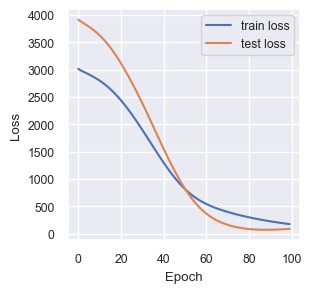

In [39]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()